In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns; sns.set()

%matplotlib inline

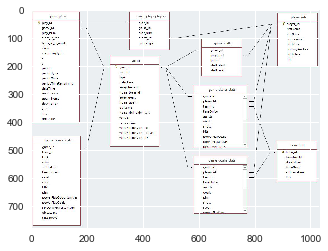

In [33]:
#Display the table relationship diagram
img=mpimg.imread('data/table_relationships.JPG')
imgplot = plt.imshow(img)
plt.show()

In [34]:
#Read in all CSV files from repository
game = pd.read_csv('data/game.csv')
game_goalie_stats = pd.read_csv('data/game_goalie_stats.csv')
game_plays = pd.read_csv('data/game_plays.csv')
game_plays_players = pd.read_csv('data/game_plays_players.csv')
game_shifts = pd.read_csv('data/game_shifts.csv')
game_skater_stats = pd.read_csv('data/game_skater_stats.csv')
game_teams_stats = pd.read_csv('data/game_teams_stats.csv')
player_info = pd.read_csv('data/player_info.csv')
team_info = pd.read_csv('data/team_info.csv')

In [35]:
#create dataframe of goalie with team name and player name
goalie_team = pd.merge(game_goalie_stats, team_info, on = 'team_id')
goalie_team = pd.merge(goalie_team, player_info, on = 'player_id')
#create dataframe of player with team name and player name
skater_team = pd.merge(game_skater_stats, team_info, on = 'team_id')
skater_team = pd.merge(skater_team, player_info, on = 'player_id')

In [36]:
skater_team.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce',
       'franchiseId', 'shortName', 'teamName', 'abbreviation', 'link_x',
       'firstName', 'lastName', 'nationality', 'birthCity', 'primaryPosition',
       'birthDate', 'link_y'],
      dtype='object')

In [37]:
game_plays.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side'],
      dtype='object')

In [38]:
game_plays.describe()

,game_id,play_num,team_id_for,team_id_against,x,y,period,periodTime,periodTimeRemaining,goals_away,goals_home,st_x,st_y
count,2.369646e+06,2.369646e+06,1.907922e+06,1.907922e+06,1.903140e+06,1.903157e+06,2.369646e+06,2.369646e+06,2.369646e+06,2.369646e+06,2.369646e+06,1.903140e+06,1.903157e+06
mean,2.014707e+09,1.648367e+02,1.762862e+01,1.755894e+01,2.861891e-01,-2.097951e-01,2.026005e+00,5.857356e+02,5.979063e+02,1.194952e+00,1.322649e+00,8.497122e+00,1.519691e-01
std,1.635618e+06,9.749416e+01,1.229775e+01,1.228052e+01,6.428901e+01,2.307910e+01,8.716109e-01,3.659118e+02,3.639756e+02,1.285669e+00,1.379465e+00,6.372565e+01,2.307955e+01
min,2.012020e+09,1.000000e+00,1.000000e+00,1.000000e+00,-9.900000e+01,-4.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-4.200000e+01
25%,2.013021e+09,8.200000e+01,8.000000e+00,8.000000e+00,-6.900000e+01,-2.200000e+01,1.000000e+00,2.650000e+02,2.820000e+02,0.000000e+00,0.000000e+00,-6.300000e+01,-2.200000e+01
50%,2.015020e+09,1.630000e+02,1.600000e+01,1.600000e+01,0.000000e+00,0.000000e+00,2.000000e+00,5.790000e+02,5.980000e+02,1.000000e+00,1.000000e+00,3.000000e+01,0.000000e+00
75%,2.016021e+09,2.440000e+02,2.400000e+01,2.400000e+01,6.900000e+01,2.200000e+01,3.000000e+00,9.030000e+02,9.140000e+02,2.000000e+00,2.000000e+00,6.900000e+01,2.200000e+01
max,2.017030e+09,6.810000e+02,5.400000e+01,5.400000e+01,9.900000e+01,4.200000e+01,6.000000e+00,1.200000e+03,1.200000e+03,9.000000e+00,1.000000e+01,9.900000e+01,4.200000e+01


In [39]:
#My computer cannot process this command - Out of Memory Error
#game_plays = pd.merge(game_plays, game_plays_players, on = 'play_num', how = 'outer')

In [40]:
#Remove nan x positions
game_plays_position = game_plays[np.isfinite(game_plays['x'])]

In [41]:
game_plays_position.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
6,2012030221_4,2012030221,4,6.0,3.0,Faceoff,NaN,0.0,0.0,1,REGULAR,0,1200,2013-05-16 23:40:15,0,0,Patrice Bergeron faceoff won against Derek Stepan,0.0,0.0,left
7,2012030221_5,2012030221,5,3.0,6.0,Hit,NaN,-92.0,30.0,1,REGULAR,30,1170,2013-05-16 23:40:49,0,0,Carl Hagelin hit Adam McQuaid,92.0,-30.0,right
8,2012030221_6,2012030221,6,6.0,3.0,Blocked Shot,NaN,-73.0,8.0,1,REGULAR,35,1165,2013-05-16 23:40:53,0,0,Matt Bartkowski blocked shot from Derick Brassard,-73.0,8.0,left
9,2012030221_7,2012030221,7,3.0,6.0,Hit,NaN,92.0,33.0,1,REGULAR,42,1158,2013-05-16 23:41:01,0,0,Michael Del Zotto hit Patrice Bergeron,-92.0,-33.0,right
10,2012030221_8,2012030221,8,6.0,3.0,Takeaway,NaN,21.0,20.0,1,REGULAR,57,1143,2013-05-16 23:41:16,0,0,Takeaway by Nathan Horton,21.0,20.0,left


In [42]:
#Free up some memory
del game_shifts
del game_plays
del game_plays_players

In [43]:
#lets only look at hits
game_plays_goals = game_plays_position[game_plays_position['event'] == 'Goal'] 
game_plays_hits = game_plays_position[game_plays_position['event'] == 'Hit']


In [44]:
game_plays_goals

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
198,2012030221_197,2012030221,197,6.0,3.0,Goal,Slap Shot,-41.0,-1.0,2,REGULAR,743,457,2013-05-17 00:57:50,0,1,"Zdeno Chara (2) Slap Shot, assists: David Krej...",41.0,1.0,right
242,2012030221_241,2012030221,241,3.0,6.0,Goal,Snap Shot,35.0,33.0,2,REGULAR,1198,2,2013-05-17 01:10:18,1,1,"Ryan McDonagh (1) Snap Shot, assists: Rick Nas...",35.0,33.0,left
250,2012030221_248,2012030221,248,3.0,6.0,Goal,Snap Shot,-58.0,-1.0,3,REGULAR,14,1186,2013-05-17 01:29:59,2,1,"Derek Stepan (3) Snap Shot, assists: Carl Hage...",58.0,1.0,right
263,2012030221_261,2012030221,261,6.0,3.0,Goal,Slap Shot,43.0,28.0,3,REGULAR,175,1025,2013-05-17 01:35:09,2,2,"Torey Krug (1) Slap Shot, assists: Dougie Hami...",43.0,28.0,left
431,2012030221_430,2012030221,430,6.0,3.0,Goal,Tip-In,-77.0,-4.0,4,OVERTIME,940,260,2013-05-17 02:46:57,2,3,"Brad Marchand (1) Tip-In, assists: Patrice Ber...",77.0,4.0,right
459,2012030222_25,2012030222,25,6.0,3.0,Goal,Snap Shot,55.0,18.0,1,REGULAR,328,872,2013-05-19 19:26:02,0,1,"Torey Krug (2) Snap Shot, assists: Nathan Hort...",55.0,18.0,left
474,2012030222_40,2012030222,40,3.0,6.0,Goal,Wrist Shot,-73.0,0.0,1,REGULAR,481,719,2013-05-19 19:29:19,1,1,"Ryan Callahan (2) Wrist Shot, assists: none",73.0,0.0,right
557,2012030222_123,2012030222,123,6.0,3.0,Goal,Backhand,-79.0,2.0,2,REGULAR,144,1056,2013-05-19 20:15:29,1,2,"Gregory Campbell (1) Backhand, assists: Torey ...",79.0,-2.0,right
563,2012030222_129,2012030222,129,3.0,6.0,Goal,Snap Shot,71.0,-10.0,2,REGULAR,200,1000,2013-05-19 20:17:50,2,2,"Rick Nash (1) Snap Shot, assists: Mats Zuccare...",71.0,-10.0,left
618,2012030222_185,2012030222,185,6.0,3.0,Goal,Wrist Shot,-48.0,23.0,2,REGULAR,728,472,2013-05-19 20:35:57,2,3,"Johnny Boychuk (3) Wrist Shot, assists: Brad M...",48.0,-23.0,right


In [29]:
#Seems like there is some issue with data type per some reading online.  Needs to be float not an object
cols = ['x', 'y']
game_plays_position[cols] = game_plays_position[cols].astype(float)

C:\Users\bbiseda\Anaconda3\lib\site-packages\pandas\core\frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [25]:
game_plays_position

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
7,2012030221_5,2012030221,5,3.0,6.0,Hit,NaN,-92.0,30.0,1,REGULAR,30,1170,2013-05-16 23:40:49,0,0,Carl Hagelin hit Adam McQuaid,92.0,-30.0,right
9,2012030221_7,2012030221,7,3.0,6.0,Hit,NaN,92.0,33.0,1,REGULAR,42,1158,2013-05-16 23:41:01,0,0,Michael Del Zotto hit Patrice Bergeron,-92.0,-33.0,right
11,2012030221_9,2012030221,9,3.0,6.0,Hit,NaN,-79.0,-32.0,1,REGULAR,67,1133,2013-05-16 23:41:25,0,0,Derick Brassard hit Dougie Hamilton,79.0,32.0,right
13,2012030221_11,2012030221,11,6.0,3.0,Hit,NaN,-97.0,22.0,1,REGULAR,121,1079,2013-05-16 23:42:19,0,0,Torey Krug hit Derek Dorsett,-97.0,22.0,left
14,2012030221_12,2012030221,12,3.0,6.0,Hit,NaN,-38.0,-29.0,1,REGULAR,130,1070,2013-05-16 23:42:33,0,0,Derek Dorsett hit Adam McQuaid,38.0,29.0,right
17,2012030221_15,2012030221,15,6.0,3.0,Hit,NaN,86.0,-25.0,1,REGULAR,158,1042,2013-05-16 23:42:56,0,0,Gregory Campbell hit Michael Del Zotto,86.0,-25.0,left
20,2012030221_18,2012030221,18,6.0,3.0,Hit,NaN,-12.0,-38.0,1,REGULAR,193,1007,2013-05-16 23:43:31,0,0,Patrice Bergeron hit Chris Kreider,-12.0,-38.0,left
22,2012030221_20,2012030221,20,6.0,3.0,Hit,NaN,16.0,-36.0,1,REGULAR,279,921,2013-05-16 23:44:57,0,0,David Krejci hit Mats Zuccarello,16.0,-36.0,left
26,2012030221_24,2012030221,24,6.0,3.0,Hit,NaN,61.0,-33.0,1,REGULAR,311,889,2013-05-16 23:46:02,0,0,Rich Peverley hit John Moore,61.0,-33.0,left
27,2012030221_25,2012030221,25,6.0,3.0,Hit,NaN,-17.0,-4.0,1,REGULAR,339,861,2013-05-16 23:46:30,0,0,Shawn Thornton hit Steve Eminger,-17.0,-4.0,left


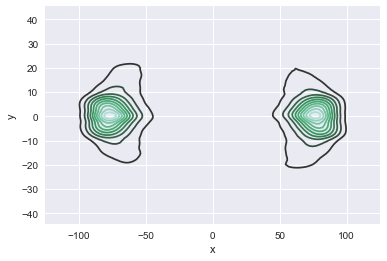

In [61]:
#Let's look at where all the Goals have occurred on the ice
#This took forever to run on my computer but eventually showed up!
ax = sns.kdeplot(game_plays_goals['x'], game_plays_goals['y'])

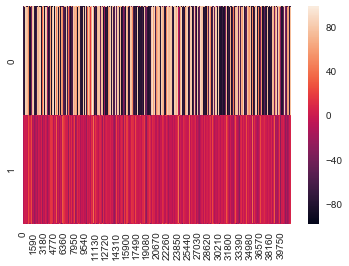

In [66]:
ax = sns.heatmap((game_plays_goals['x'], game_plays_goals['y']))

In [15]:
#Let's see what variables are out here
%who

cols	 game	 game_goalie_stats	 game_plays_position	 game_skater_stats	 game_teams_stats	 goalie_team	 img	 imgplot	 
mpimg	 np	 pd	 player_info	 plt	 skater_team	 sns	 team_info	 


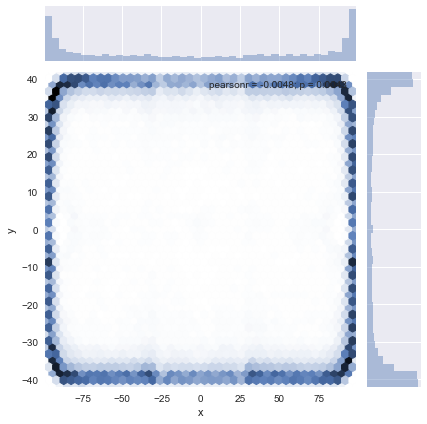

In [31]:
#Where do hits occur on the ice
sns.jointplot('x', 'y', data=game_plays_position, kind="hex")

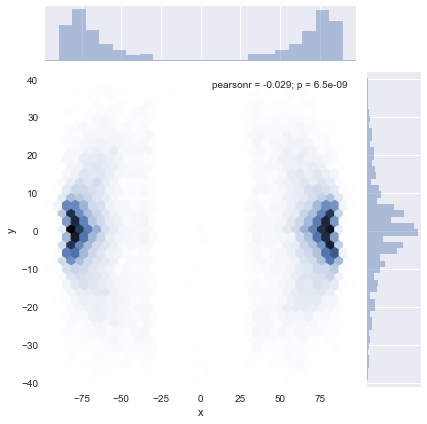

In [45]:
#How about goals?
sns.jointplot('x', 'y', data=game_plays_goals, kind="hex")

The above graph is assymetrical along the y axis.  It would appear that there is some bias in terms of handedness?

In [46]:
#Test this line
#sns.jointplot('x', 'y', data=game_plays_position, kind="kde")

# This linke has some nice visualizations we could try 
https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

Heat maps:

https://seaborn.pydata.org/generated/seaborn.heatmap.html

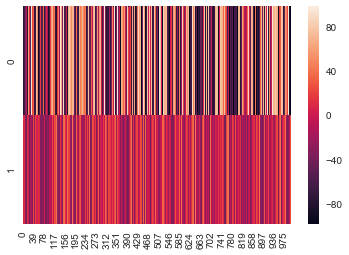

In [49]:
#Just plot 1000 points because it takes forever
#This visualization style could be good but I can't get this to work correctly
g = sns.heatmap([game_plays_position[:1000]['x'], game_plays_position[:1000]['y']])

In [ ]:
#Not working correctly

#g = sns.JointGrid('x','y', data = game_plays_position)
#g = g.plot_joint(plt.scatter, color='0.5', edgecolor='white')
#g = g.plot_joint(sns.kdeplot, zorder=0, n_levels=6)
#g = g.plot_marginals(sns.kdeplot, shades=True)

In [50]:
skater_team.groupby('teamName').mean()['shots']

teamName
Avalanche         1.598631
Blackhawks        1.790158
Blue Jackets      1.678713
Blues             1.660202
Bruins            1.795207
Canadiens         1.682508
Canucks           1.624718
Capitals          1.664878
Coyotes           1.621422
Devils            1.514399
Ducks             1.683023
Flames            1.609584
Flyers            1.692872
Golden Knights    1.805556
Hurricanes        1.741568
Islanders         1.730867
Jets              1.687196
Kings             1.722083
Lightning         1.653609
Maple Leafs       1.669572
Oilers            1.637018
Panthers          1.727458
Penguins          1.787052
Predators         1.700780
Rangers           1.708486
Red Wings         1.645949
Sabres            1.570805
Senators          1.715123
Sharks            1.762894
Stars             1.706499
Wild              1.629662
Name: shots, dtype: float64

(array([1., 1., 1., 4., 3., 7., 5., 4., 1., 4.]),
 array([1.51439885, 1.54351452, 1.57263019, 1.60174586, 1.63086153,
        1.6599772 , 1.68909287, 1.71820854, 1.74732421, 1.77643988,
        1.80555556]),
 <a list of 10 Patch objects>)

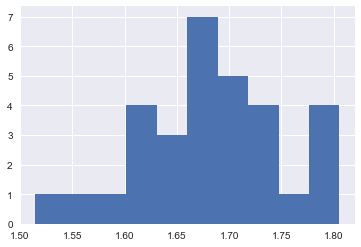

In [51]:
#Group by team
by_team = skater_team.groupby('teamName').mean()
plt.hist(skater_team.groupby('teamName').mean()['shots'])#.plot(legend=True)

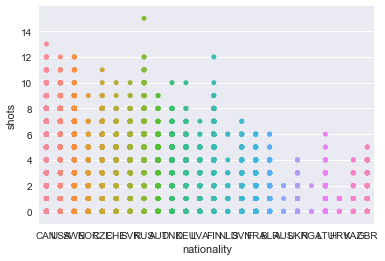

In [52]:
g = sns.stripplot(x='nationality', y = 'shots', data=skater_team)

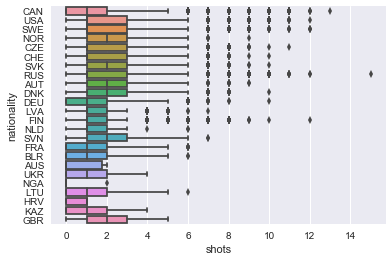

In [53]:
g = sns.boxplot(x='shots', y='nationality', data=skater_team)

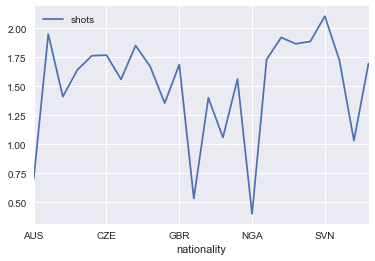

In [54]:
#Group skaters by nationality
by_country = skater_team.groupby('nationality').mean()
skater_team.groupby('nationality').mean()['shots'].plot(legend=True)


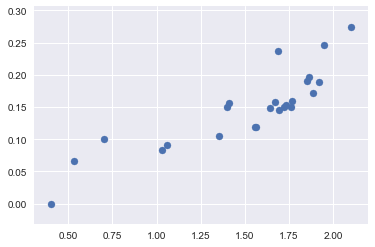

In [55]:
plt.scatter(by_country['shots'],by_country['goals'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DAE5B47A90>]],
      dtype=object)

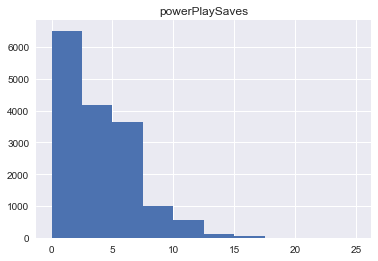

In [56]:
goalie_team.hist('powerPlaySaves')

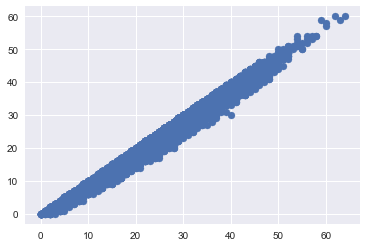

In [57]:
plt.scatter(goalie_team['shots'], goalie_team['saves'])

In [58]:
game_goalie_stats

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
0,2012030221,8468685,3,4540,0,0,0,48,45,10,1,34,1,36,11,L,93.750000,90.909091,94.444444
1,2012030221,8471695,6,4540,0,0,0,35,33,3,0,30,0,32,3,W,94.285714,100.000000,93.750000
2,2012030222,8468685,3,3600,0,0,0,32,27,1,2,24,2,29,1,L,84.375000,100.000000,82.758621
3,2012030222,8471695,6,3600,0,0,0,37,35,7,1,27,1,29,7,W,94.594595,100.000000,93.103448
4,2012030223,8471695,6,3600,0,0,0,24,23,2,0,21,0,22,2,W,95.833333,100.000000,95.454545
5,2012030223,8468685,3,3534,0,0,0,34,32,0,0,32,0,34,0,L,94.117647,NaN,94.117647
6,2012030224,8471695,6,4019,0,0,0,32,28,5,1,22,1,25,6,L,87.500000,83.333333,88.000000
7,2012030224,8468685,3,4023,0,0,0,40,37,6,0,31,0,32,8,W,92.500000,75.000000,96.875000
8,2012030225,8468685,3,3547,0,0,0,31,29,2,2,25,2,26,3,L,93.548387,66.666667,96.153846
9,2012030225,8471695,6,3600,0,0,0,29,28,1,2,25,2,25,2,W,96.551724,50.000000,100.000000
